In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
%%shell
jupyter nbconvert --to html '/content/CKokis_FDS_Project_LearnerNotebook_FullCode (1).ipynb'

[NbConvertApp] WARNING | pattern '/content/CKokis_FDS_Project_LearnerNotebook_FullCode (1).ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to:

CalledProcessError: Command 'jupyter nbconvert --to html '/content/CKokis_FDS_Project_LearnerNotebook_FullCode (1).ipynb'
' returned non-zero exit status 255.

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/MIT Python and AI for Data Science/Week 2/Foodhub Project/foodhub_order.csv')
# returns the first 5 rows
df.head()

order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# number of columns:
col_count = len(df.columns)

# number of rows:
row_count = len(df.index)

print('The number of rows is', row_count,'and the number of columns is', col_count, sep = ' ')

# or we can do:
df.shape

The number of rows is 1898 and the number of columns is 9


(1898, 9)

#### Observations:

The cell has 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

The dataset contains integers, floats, and objects.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
df.isnull().values.any()

False

#### Observations:

There are no missing values in the dataset.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe(include='all').transpose()

count unique          top  freq           mean  \
order_id               1898.0    NaN          NaN   NaN      1477495.5   
customer_id            1898.0    NaN          NaN   NaN  171168.478398   
restaurant_name          1898    178  Shake Shack   219            NaN   
cuisine_type             1898     14     American   584            NaN   
cost_of_the_order      1898.0    NaN          NaN   NaN      16.498851   
day_of_the_week          1898      2      Weekend  1351            NaN   
rating                   1898      4    Not given   736            NaN   
food_preparation_time  1898.0    NaN          NaN   NaN       27.37197   
delivery_time          1898.0    NaN          NaN   NaN      24.161749   

                                 std        min         25%        50%  \
order_id                  548.049724  1476547.0  1477021.25  1477495.5   
customer_id            113698.139743     1311.0    77787.75   128600.0   
restaurant_name                  NaN        NaN         NaN        NaN   
cuisine_type                     NaN        NaN         NaN        NaN   
cost_of_the_order           7.483812       4.47       12.08      14.14   
day_of_the_week                  NaN        NaN         NaN        NaN   
rating                           NaN        NaN         NaN        NaN   
food_preparation_time       4.632481       20.0        23.0       27.0   
delivery_time               4.972637       15.0        20.0       25.0   

                              75%        max  
order_id               1477969.75  1478444.0  
customer_id              270525.0   405334.0  
restaurant_name               NaN        NaN  
cuisine_type                  NaN        NaN  
cost_of_the_order         22.2975      35.41  
day_of_the_week               NaN        NaN  
rating                        NaN        NaN  
food_preparation_time        31.0       35.0  
delivery_time                28.0       33.0

#### Observations:

For food preparation time: the average time is approx. 27 minutes, the minimum time it takes is 20 min, and the max time it takes is 35 min.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
df['rating'].unique() # used this to check the specific name of the orders that weren't rated
df['rating'].value_counts()['Not given'] # used this to get the specific value

736

#### Observations:

There are 736 orders that aren't rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

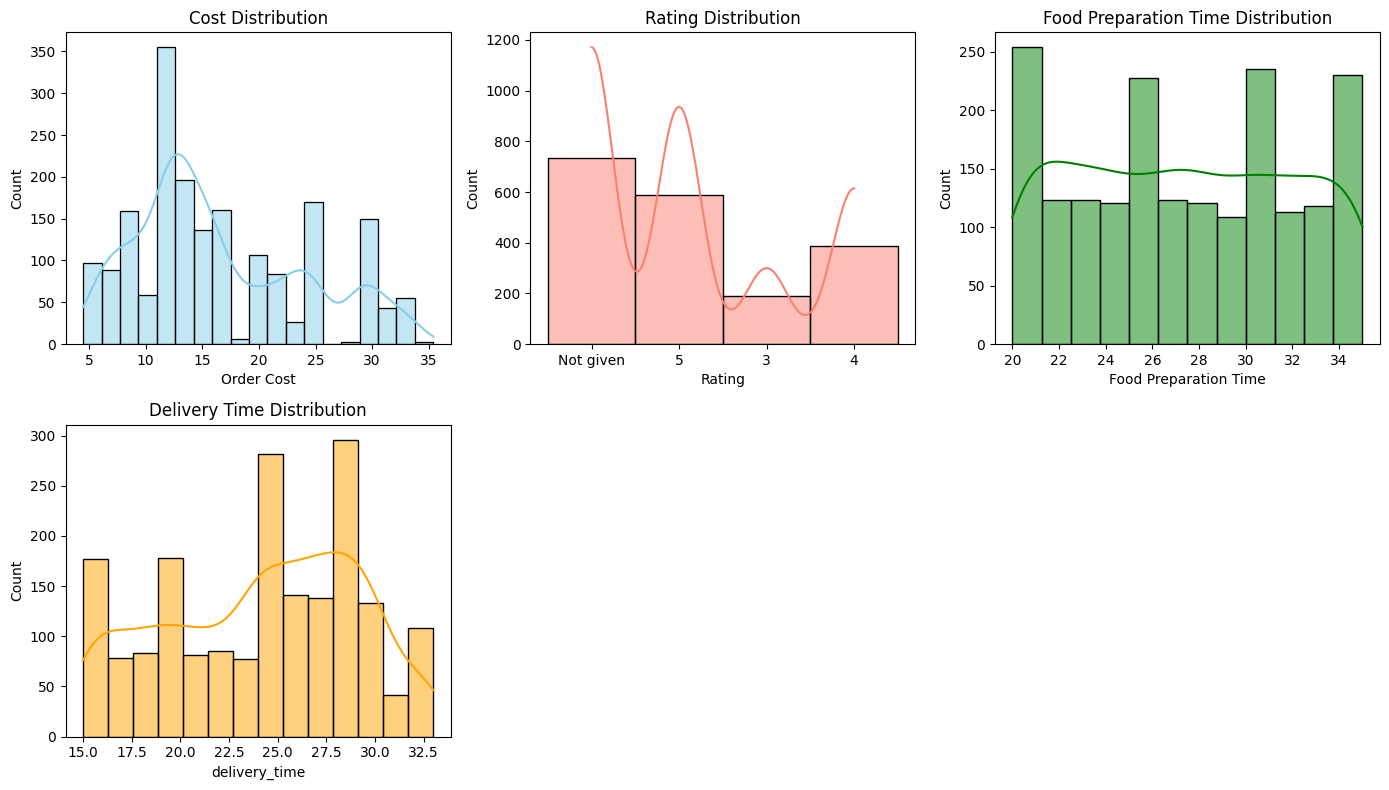

In [ ]:
# Write the code here
# Histograms:
# Order Cost
plt.figure(figsize=(14, 8))
plt.subplots_adjust(wspace = 0.5, hspace=0.5)
plt.subplot(2, 3, 1)
sns.histplot(df['cost_of_the_order'], kde=True, color='skyblue')
plt.title('Cost Distribution')
plt.xlabel('Order Cost')

# Rating
plt.subplot(2, 3, 2)
sns.histplot(df['rating'], kde=True, color='salmon')
plt.title('Rating Distribution')
plt.xlabel('Rating')

# Preparation Time
plt.subplot(2, 3, 3)
sns.histplot(df['food_preparation_time'], kde=True, color='green')
plt.title('Food Preparation Time Distribution')
plt.xlabel('Food Preparation Time')

# Delivery Time
plt.subplot(2, 3, 4)
sns.histplot(df['delivery_time'], kde=True, color='orange')
plt.title('Delivery Time Distribution')



plt.tight_layout()
plt.show()

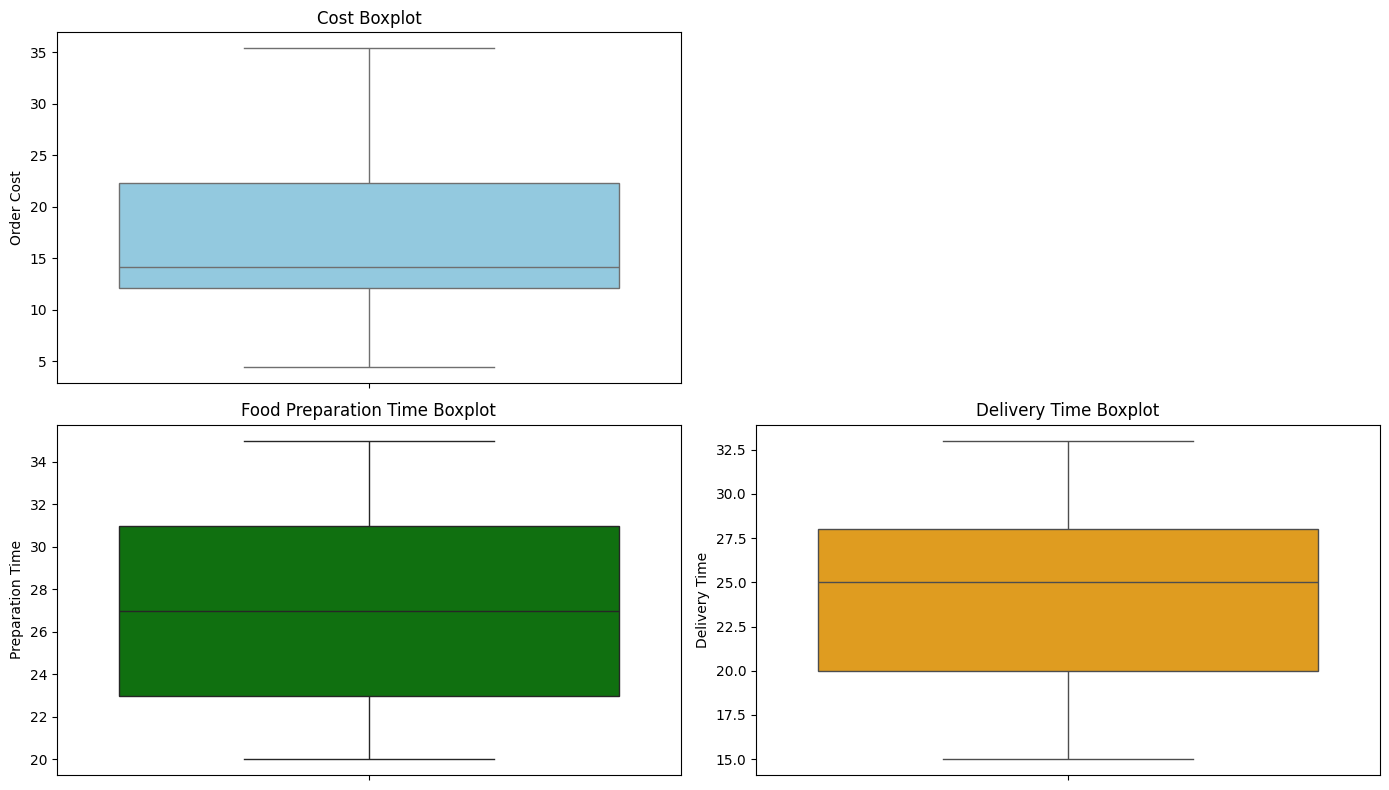

In [ ]:
#Boxplots:

# Boxplots
# Plot of Order Cost
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
sns.boxplot(df['cost_of_the_order'], color='skyblue')
plt.title('Cost Boxplot')
plt.ylabel('Order Cost')


# Preparation Time
plt.subplot(2, 2, 3)
sns.boxplot(df['food_preparation_time'], color='green')
plt.title('Food Preparation Time Boxplot')
plt.ylabel('Preparation Time')

# Delivery Time
plt.subplot(2, 2, 4)
sns.boxplot(df['delivery_time'], color='orange')
plt.title('Delivery Time Boxplot')
plt.ylabel('Delivery Time')

plt.tight_layout()
plt.show()

<ipython-input-24-9aac9164089a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['day_of_the_week'], palette='viridis')
<ipython-input-24-9aac9164089a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['cuisine_type'], palette='magma', order=df['cuisine_type'].value_counts().index)


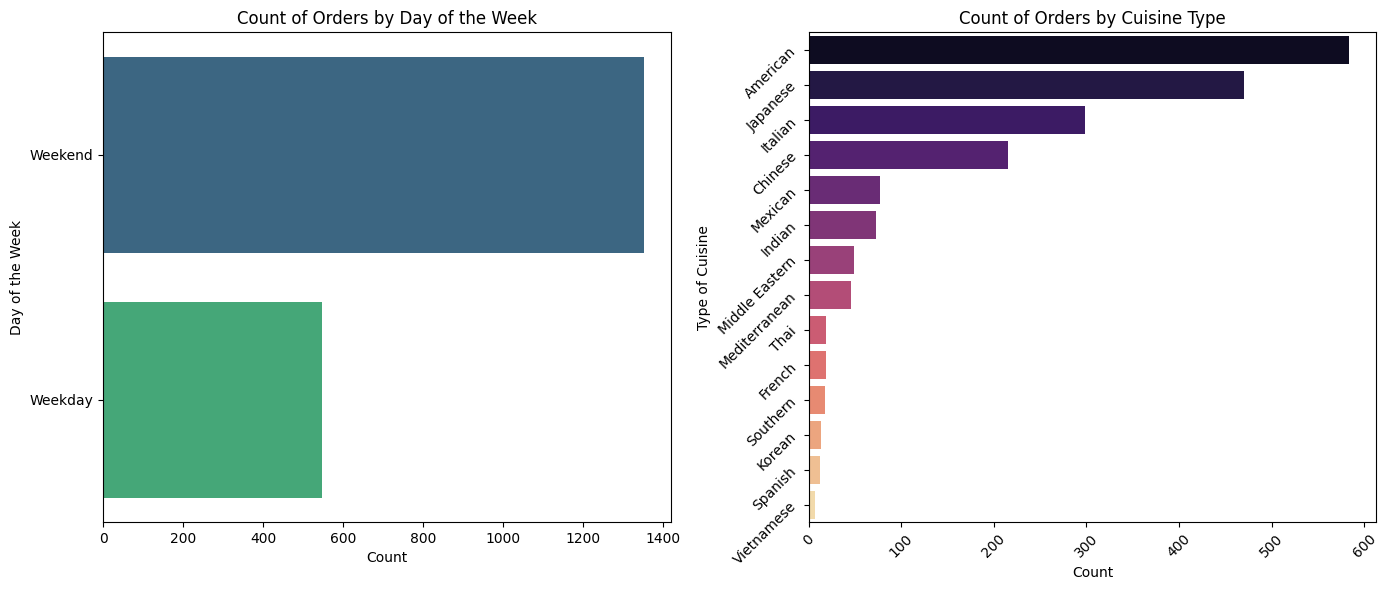

In [ ]:
# Countplots

# Days of the Week
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(df['day_of_the_week'], palette='viridis')
plt.title('Count of Orders by Day of the Week')
plt.ylabel('Day of the Week')
plt.xlabel('Count')


# Cuisine Type
plt.subplot(1, 2, 2)
sns.countplot(df['cuisine_type'], palette='magma', order=df['cuisine_type'].value_counts().index)
plt.xticks(rotation=45)
plt.yticks(rotation = 45)
plt.title('Count of Orders by Cuisine Type')
plt.ylabel('Type of Cuisine')
plt.xlabel('Count')


plt.tight_layout()
plt.show()

<ipython-input-36-8f95b4192a11>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['customer_id'].isin(top_10_customers.index)], x='customer_id', palette='Set2', order=top_10_customers.index)


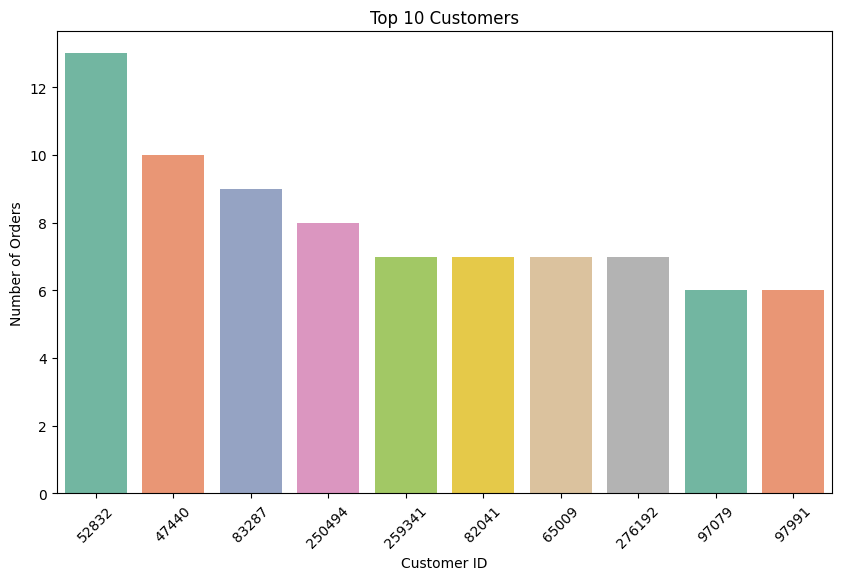

In [ ]:
# Customers
# There's a lot of customers in the dataset, but I'm going to look at the top most regular customers
# Find the top 10 most frequent Customer IDs
top_10_customers = df['customer_id'].value_counts().head(10)

# Plot countplot of top 10 customers
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['customer_id'].isin(top_10_customers.index)], x='customer_id', palette='Set2', order=top_10_customers.index)
plt.title('Top 10 Customers')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

Some Observations:



*   The distribution of cost seems to be right-skewed, but the bulk of the order costs tend to be between 10 to 15 USD.
*   Delivery time exhibits some left skewness, but the majority of the times take between 24 to 28 minutes.
*   Most people tend to not leave a rating on the order.
*   The three most popular types of cuisine are American, Japanese, and Italian.
*   More people tend to order delivery on weekdays as opposed to weekends.
*   The food preparation time seems to be multimodal and exhibits peaks in the dataset in increments of approximately 5 (Ie. deliveries tend to mostly 20 minutes, 25 minues, 30 minutes, etc.) My guess is that restaruants may have internal control processes to quantify the amount of time the preparation of certain dishes should take.
*   The top customers that use FoodHub have placed orders through the app anywhere between 6 to 12 times.



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
quest_7 = df.groupby(['restaurant_name'])['order_id'].count().copy()
quest_7.sort_values(ascending = False).head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64

#### Observations:

The top 5 restaurants in terms of the number of orders received is:

1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
quest_8 = df[df['day_of_the_week'] == 'Weekend'].copy()
quest_8.groupby(['cuisine_type'])['order_id'].count().sort_values(ascending=False)

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: order_id, dtype: int64

#### Observations:

It seems that American cuisine is the most popular on weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
more_20 = len(df[df['cost_of_the_order'] > 20])

#We know that the total number of orders is 1898 from question 1.
quest_9 = round(more_20/1898 *100, 2)
print(quest_9, '%', sep = '')

29.24%


#### Observations:

Approximately 29.24% of orders are more than $20.



### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
quest_10 = round(df['delivery_time'].mean(), 2)
quest_10

24.16

#### Observations:

The mean order delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
quest_11 = df.groupby(['customer_id'])['order_id'].count().copy()
quest_11.sort_values(ascending = False).head(3)

customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64

#### Observations:
The top 3 most frequent customers are:

1.   Customer 52832 with 13 orders.
2.   Customer 47440 with 10 orders.
3.   Customer 83287 with 9 orders.






### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
# Correlation matrix
correlation_matrix = df[['cost_of_the_order',  'food_preparation_time', 'delivery_time']].corr()
correlation_matrix

# I think it'd be a good idea to look and see how rating correlates with some of the data, but there are some limitations due to the fact that while "rating" is on a scale from 1 to 5, it's technically
# a categorical variable, given that one of the entries is "Not Given", which is not a numeric value. Therefore I will use the dataframe created from Question 13 to conduct my analysis when considering
# correlation between variables.

matrix_w_r = quest_13[['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']].corr() # Matrix with rating (wr)
matrix_w_r

cost_of_the_order    rating  food_preparation_time  \
cost_of_the_order               1.000000  0.033983               0.035445   
rating                          0.033983  1.000000              -0.006083   
food_preparation_time           0.035445 -0.006083               1.000000   
delivery_time                  -0.075892 -0.009804              -0.008635   

                       delivery_time  
cost_of_the_order          -0.075892  
rating                     -0.009804  
food_preparation_time      -0.008635  
delivery_time               1.000000

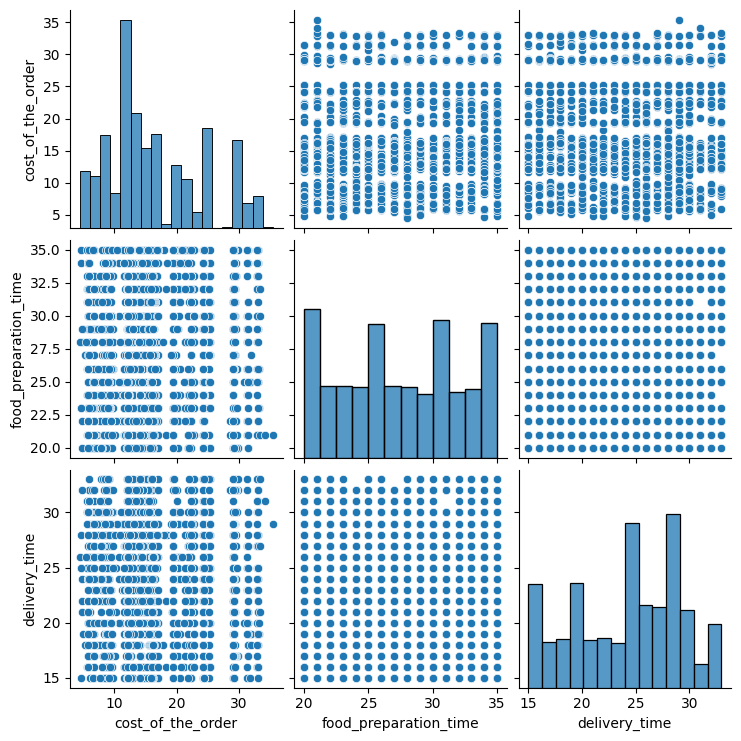

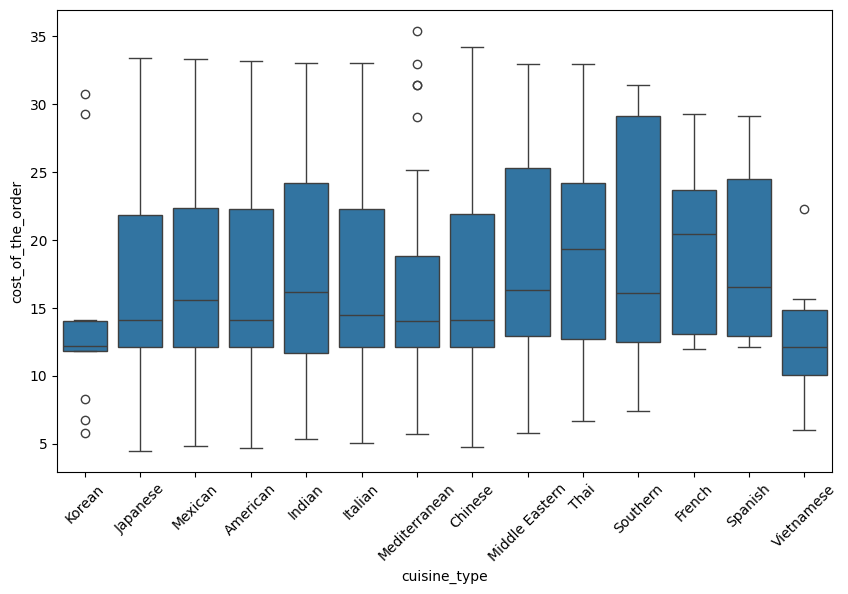

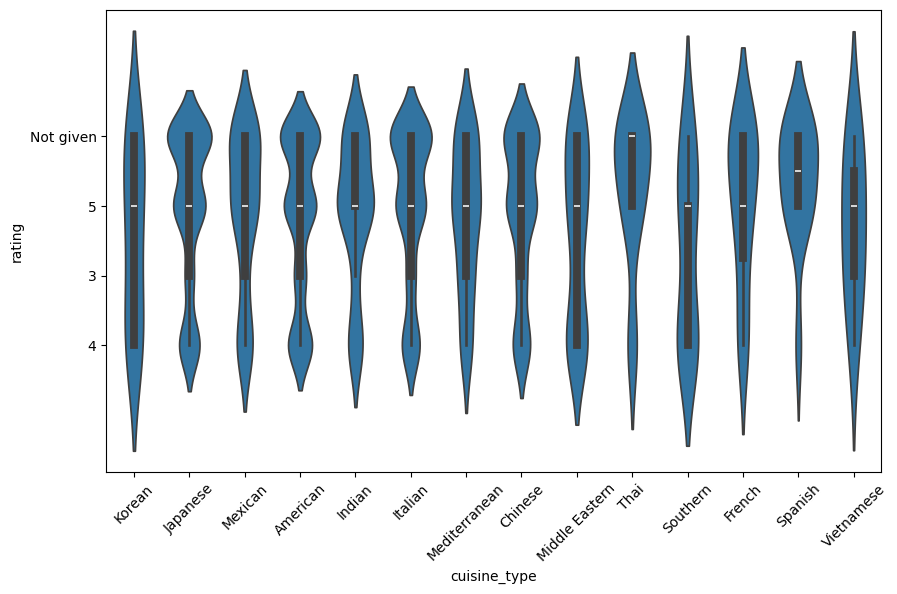

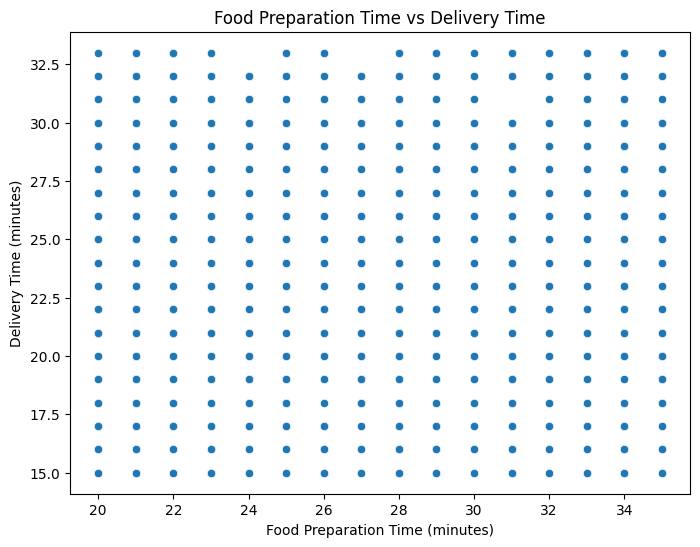

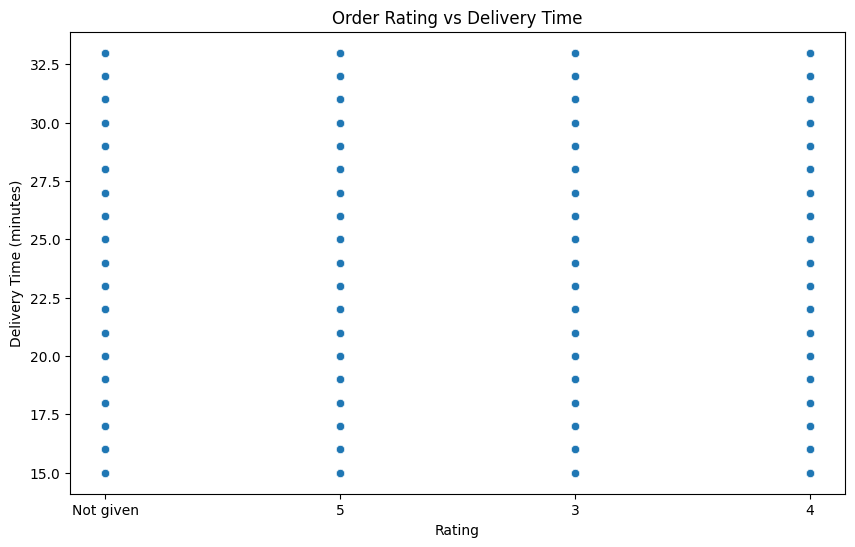

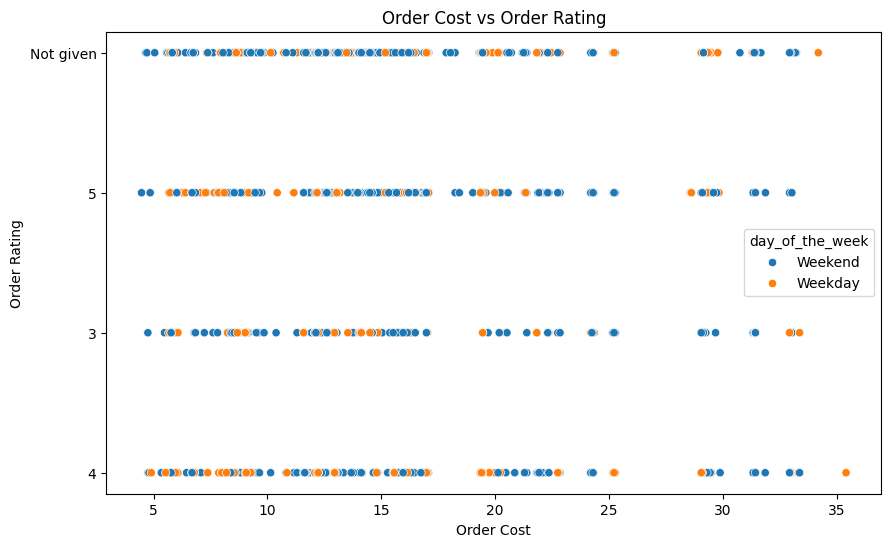

<Figure size 1000x600 with 0 Axes>

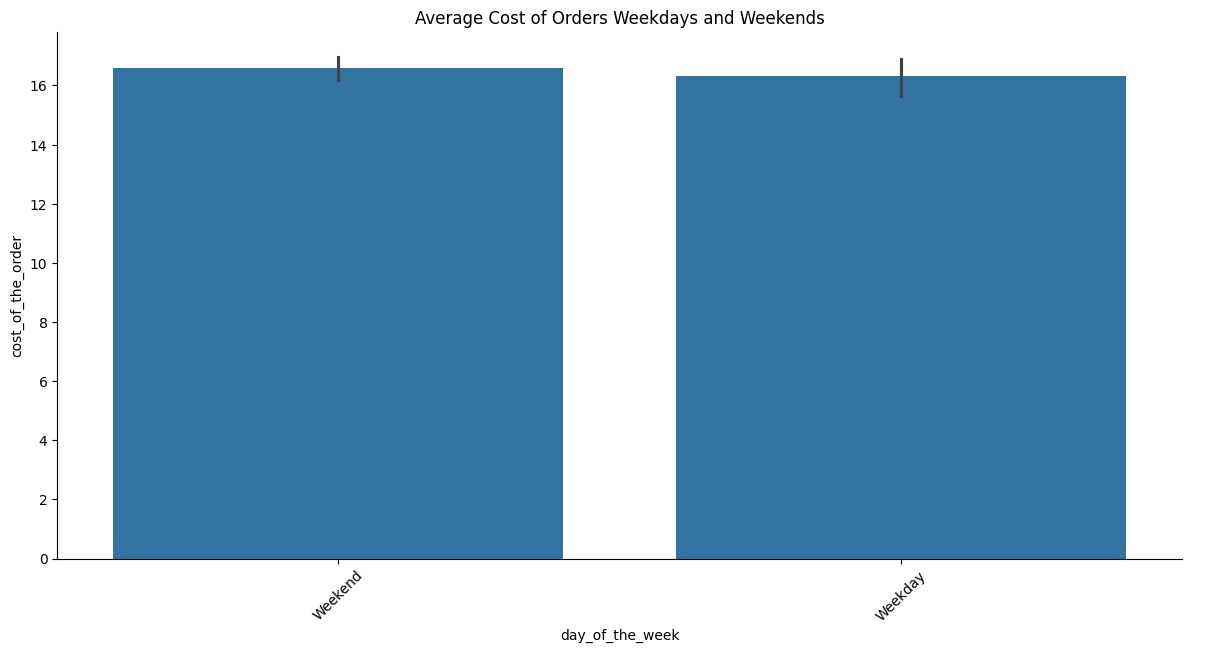

<Figure size 2000x1000 with 0 Axes>

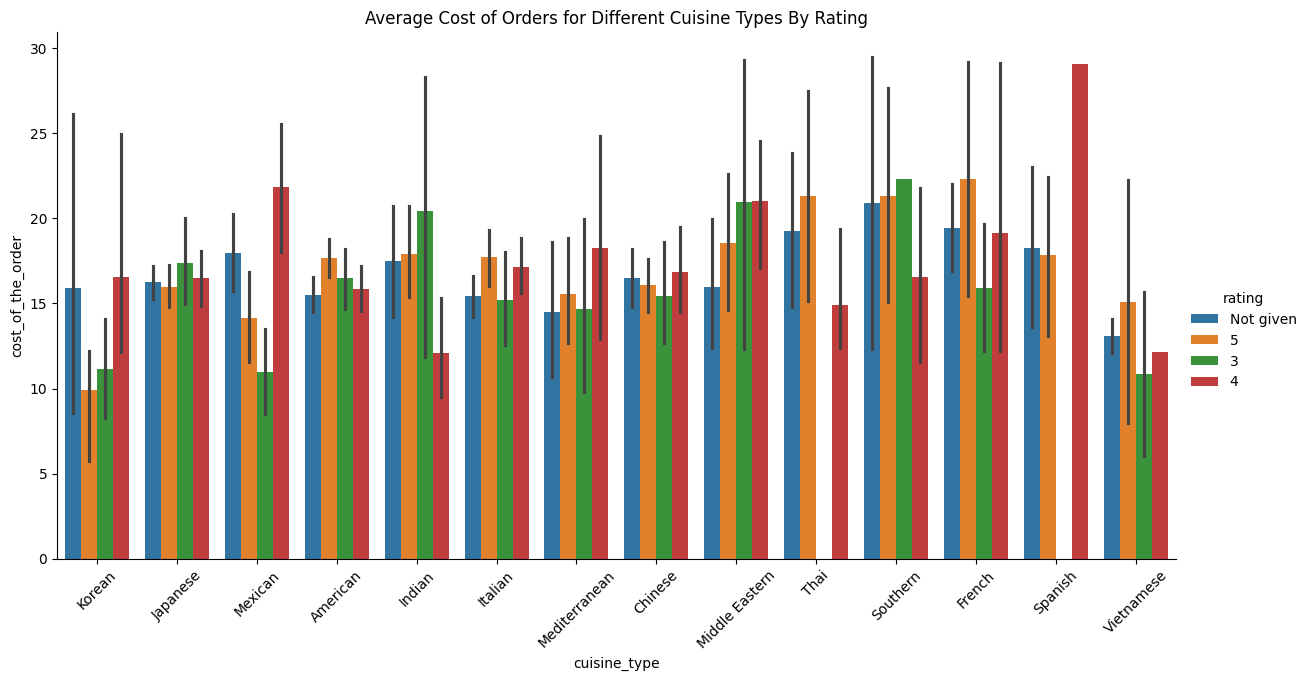

In [ ]:
# Write the code here
# Pairplot to visualize relationships between numerical variables
sns.pairplot(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']])
plt.show()

# Boxplot to visualize the distribution of cost across different cuisine types
plt.figure(figsize=(10, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.xticks(rotation=45)
plt.show()

# Violinplot to visualize the distribution of ratings for each cuisine type
plt.figure(figsize=(10, 6))
sns.violinplot(x='cuisine_type', y='rating', data=df)
plt.xticks(rotation=45)
plt.show()

# Scatterplot to visualize the relationship between food preparation time and delivery time
plt.figure(figsize=(8, 6))
sns.scatterplot(x='food_preparation_time', y='delivery_time', data=df)
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Delivery Time (minutes)')
plt.title('Food Preparation Time vs Delivery Time')
plt.show()

# Scatterplot to visualize the relationship between order rating and delivery time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='delivery_time', data=df)
plt.xlabel('Rating')
plt.ylabel('Delivery Time (minutes)')
plt.title('Order Rating vs Delivery Time')
plt.show()

# Scatterplot to visualize the relationship between order cost and order rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cost_of_the_order', y='rating', data=df, hue = 'day_of_the_week')
plt.xlabel('Order Cost')
plt.ylabel('Order Rating')
plt.title('Order Cost vs Order Rating')
plt.show()



# Catplot to compare average cost of the orders on weekdays and weekends
plt.figure(figsize=(10, 6))
sns.catplot(x='day_of_the_week', y='cost_of_the_order', kind='bar', data=df, height=6, aspect=2)
plt.xticks(rotation=45)
plt.title('Average Cost of Orders Weekdays and Weekends')
plt.show()


# Catplot to compare average cost for each cuisine type by rating
plt.figure(figsize=(20, 10))
sns.catplot(x='cuisine_type', y='cost_of_the_order', hue='rating', kind='bar', data=df, height=6, aspect=2)
plt.xticks(rotation=45)
plt.title('Average Cost of Orders for Different Cuisine Types By Rating')
plt.show()




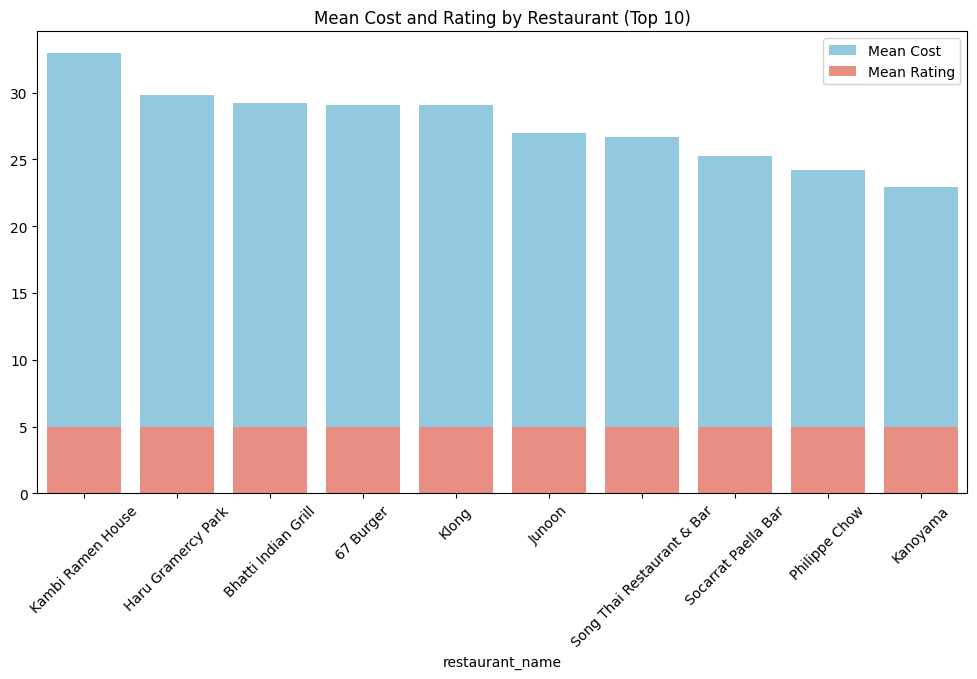

In [ ]:
#I also want to generate a graph that looks at the top 10 restaurants with the highest mean cost and rating. Again, the rating vatiable is categorical
# so I'm using the dataset from question 13 where rating is numeric to generate my graph.
# Grouping by restaurant_name and calculating mean cost and rating
grouped_data = quest_13.groupby("restaurant_name").agg({"cost_of_the_order": "mean", "rating": "mean"}).reset_index()

# Sort the grouped data by mean cost and rating
sorted_data = grouped_data.sort_values(by=["rating", "cost_of_the_order"], ascending=False)

# Select the top 10 restaurants
top_10_restaurants = sorted_data.head(10)

# Bar plot of mean cost and rating by restaurant_name for top 10 restaurants
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_restaurants, x="restaurant_name", y="cost_of_the_order", color="skyblue", label="Mean Cost")
sns.barplot(data=top_10_restaurants, x="restaurant_name", y="rating", color="salmon", label="Mean Rating")
plt.title("Mean Cost and Rating by Restaurant (Top 10)")
plt.ylabel('')
plt.xticks(rotation=45)
plt.legend()
plt.show()



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
# Remove all of the instances with 'Not given'
quest_13 = df[df['rating'] != ('Not given')].copy()

# It seems like the variable 'rating' is a string and we need to convert it into an integer, so we need to change it.
quest_13['rating'] = quest_13['rating'].astype(int)

# Filter restaurants with a rating count of more than 50
filtered_restaurants = quest_13.groupby('restaurant_name').filter(lambda x: x['rating'].count() > 50)

# Calculate the average rating for each restaurant
average_ratings = filtered_restaurants.groupby('restaurant_name')['rating'].mean()

# Filter restaurants with an average rating greater than 4
eligible_restaurants = average_ratings[average_ratings > 4].index

# Get the final list of restaurants fulfilling the criteria
final_restaurants = filtered_restaurants[filtered_restaurants['restaurant_name'].isin(eligible_restaurants)]

# Display the final list of restaurants
print(final_restaurants['restaurant_name'].unique())


['Blue Ribbon Fried Chicken' 'Shake Shack' 'Blue Ribbon Sushi'
 'The Meatball Shop']


#### Observations:
The restaurants that are elligible for this promotion are:



*   Blue Ribbon Fried Chicken
*   Shake Shack
*   Blue Ribbon Sushi
*   The Meatball Shop




### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
#ASSUMPTION: I am assuming the charge on the orders is Foodhub's only source of revenue, and therefore the "net revenue" to FoodHub is calculated as cost * charge. If the order is less than $5,
# I'm assuming the company gets no revenue.
quest_14 = df.copy()
#Write a function to calculate the net revenue

def net_revenue(cost):
  if cost > 20:
    return cost * 0.25
  elif cost > 5:
    return cost * 0.15
  else:
    return 0

quest_14['net_revenue']= quest_14['cost_of_the_order'].apply(net_revenue)

print('The total revenue for the company is', round(quest_14['net_revenue'].sum(),2))

The total revenue for the company is 6166.3


#### Observations:

The total revenue for the company is $6,166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
quest_15 = len(df[df['food_preparation_time']+ df['delivery_time'] > 60])

#We know that the total number of orders is 1898 from question 1.
final_answer = round(quest_15/1898 *100, 2)
print(final_answer, '%', sep = '')



10.54%


#### Observations:

Only 10.54% of observations take longer than 60 minutes to get delivered.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:

It seems like the mean delivery time on weekends is approximately 6 minutes faster than on weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The top three cuisines that people order are American, Japanese, and Italian
*  The most popular restaurants (by rating volume and average rating) are Blue Ribbon Fried Chicken, Shake Shack, Blue Ribbon Sushi, and The Meatball Shop
*  Most customers do not care enough to leave a rating
*  While intuitively there should be a linear relationship between preparation time and cost, this does not seem to be the case in the data.
*  Order volume seems to be higher on weekends. While in the graph it shows that Weekdays order count is larger than weekend order count, recall that there are 5 weekdays and only two days in the weekend, therefore, on a given day, it seems like on average there are more orders on the weekend than on a weekday.

### Recommendations:

In order to optimize revenue, I would recommend focusing on expanding visibility on types of cuisines by incorporating reccomendations on said cuisines. In this case, it would be American, Japanese, and Italian food. Additionally, you could reward customer loyalty, offering discounts to customers that are frequent users of the apps. A weekend surcgarge could also be applied to orders. Finally, I would reccomend to capitalize on the most popular restaurants. For these restaurants, it is likely that customers do not mind the higher price to begin with, and the company could include a small charge for higher demand on these restaurants.

---